# Predicting suicide in postpartum depression patients


## Exploratory Data Analysis (EDA)
#### 1.Data exploration
#### 2.Data Cleaning 
#### 3.Data Visualizing 
#### 4.Data transformation

### 1.Data exploration

In [70]:
# import needed libraries
import pandas as pd
import numpy as np
import graphviz
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,precision_recall_curve, f1_score, roc_curve, roc_auc_score

In [71]:
# Read data from csv file
Data=pd.read_csv('/kaggle/input/postpartum-depression/post natal data.csv')
# display first 5 rows
Data.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [72]:
# display columns name
Data.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [73]:
# Rename a column
Data.rename(columns = {'Feeling anxious':'Anxious','Feeling of guilt':'Guilt','Suicide attempt':'Suicide_attempt'}, inplace = True)

In [74]:
# Rename a feature
Data['Trouble sleeping at night'] = Data['Trouble sleeping at night'].replace({'Two or more days a week': 'd>=2'})
Data.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Anxious,Guilt,Problems of bonding with baby,Suicide_attempt
0,6/14/2022 20:02,35-40,Yes,Yes,d>=2,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,d>=2,Yes,No,Yes,No,Yes,No


In [75]:
# Data shape
print("DataSet contain:\n{0} rows \n{1} columns".format(Data.shape[0],Data.shape[1]))

DataSet contain:
1503 rows 
11 columns


In [76]:
# display data type and count of non-null values for each column
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Anxious                                    1503 non-null   object
 8   Guilt                                      1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide_attempt                     

In [77]:
# display the frequencies for columns
Data.count()

Timestamp                                    1503
Age                                          1503
Feeling sad or Tearful                       1503
Irritable towards baby & partner             1497
Trouble sleeping at night                    1503
Problems concentrating or making decision    1491
Overeating or loss of appetite               1503
Anxious                                      1503
Guilt                                        1494
Problems of bonding with baby                1503
Suicide_attempt                              1503
dtype: int64

In [78]:
# descriptive statistics for data
Data.describe().T

,count,unique,top,freq
Timestamp,1503,90,6/15/2022 22:24,51
Age,1503,5,40-45,364
Feeling sad or Tearful,1503,3,Yes,536
Irritable towards baby & partner,1497,3,Yes,555
Trouble sleeping at night,1503,3,d>=2,640
Problems concentrating or making decision,1491,3,No,583
Overeating or loss of appetite,1503,3,No,841
Anxious,1503,2,Yes,980
Guilt,1494,3,No,624
Problems of bonding with baby,1503,3,No,557


### 2. Data Cleaning 

In [79]:
# Look for missing values 
Data.isna().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Anxious                                       0
Guilt                                         9
Problems of bonding with baby                 0
Suicide_attempt                               0
dtype: int64

In [80]:
# handling missing values
Data.dropna(inplace = True)
Data.isna().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Anxious                                      0
Guilt                                        0
Problems of bonding with baby                0
Suicide_attempt                              0
dtype: int64

In [81]:
# delete Timestamp column (feature selection)
Data=Data.drop(['Timestamp'], axis=1)
Data.shape

(1491, 10)

In [82]:
# check target values
Data['Suicide_attempt'].unique()

array(['Yes', 'No', 'Not interested to say'], dtype=object)

In [83]:
# drop 'Not interested to say'
Data.drop(Data[Data['Suicide_attempt'] == "Not interested to say"].index, inplace = True)
Data['Suicide_attempt'].unique()

array(['Yes', 'No'], dtype=object)

In [84]:
# summery statistics for data
Data.describe().T

,count,unique,top,freq
Age,1156,5,35-40,279
Feeling sad or Tearful,1156,3,Yes,425
Irritable towards baby & partner,1156,3,Yes,431
Trouble sleeping at night,1156,3,d>=2,431
Problems concentrating or making decision,1156,3,No,416
Overeating or loss of appetite,1156,3,No,660
Anxious,1156,2,Yes,838
Guilt,1156,3,No,555
Problems of bonding with baby,1156,3,No,443
Suicide_attempt,1156,2,No,703


### 3.Data Visualizing 

In [85]:
Suicide_attempt_count=Data['Suicide_attempt'].value_counts()
Suicide_attempt_count

No     703
Yes    453
Name: Suicide_attempt, dtype: int64

-> imbalanced dataset

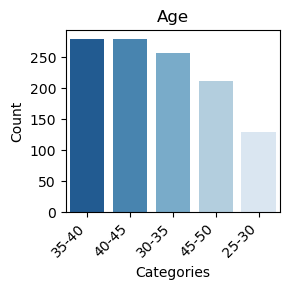

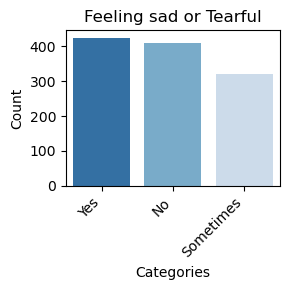

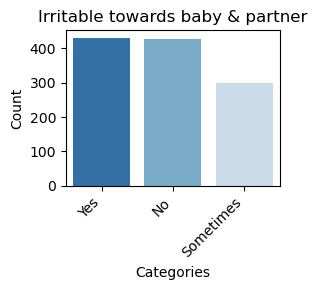

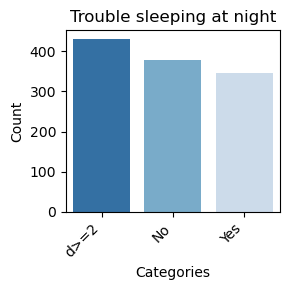

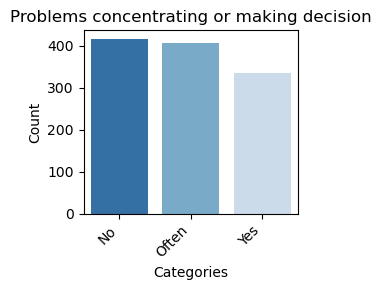

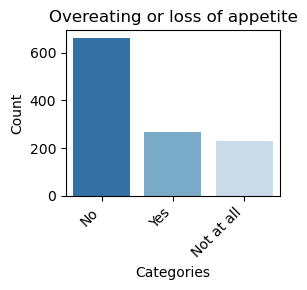

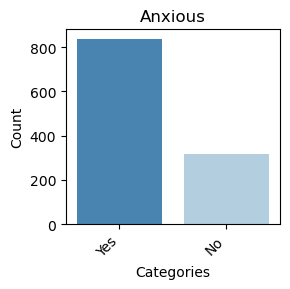

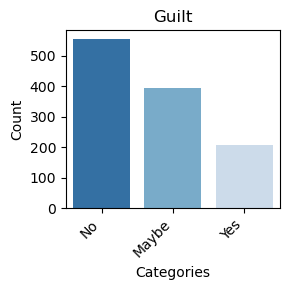

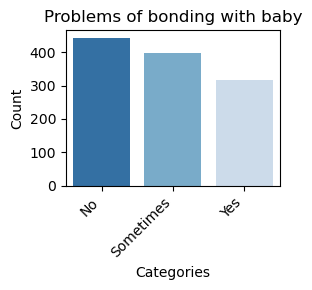

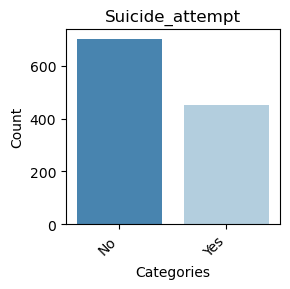

In [86]:
for i in Data.columns:
    if Data[i].dtype == 'object':
        plt.figure(figsize=(3,3))
        a = Data[i].value_counts()
        sns.barplot(x=a.index, y=a.values, palette='Blues_r')
        plt.title(i)
        plt.xlabel('Categories')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

<Figure size 300x400 with 0 Axes>

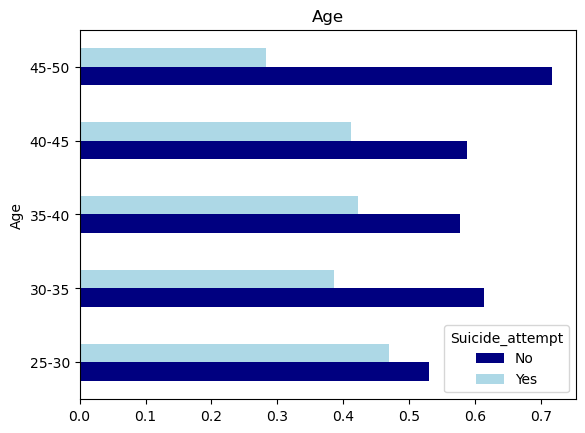

<Figure size 300x400 with 0 Axes>

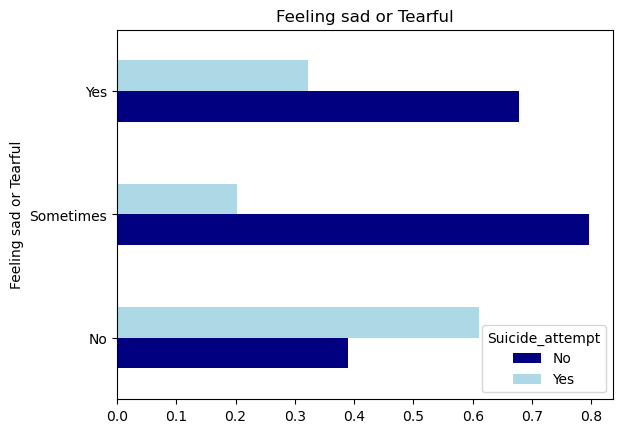

<Figure size 300x400 with 0 Axes>

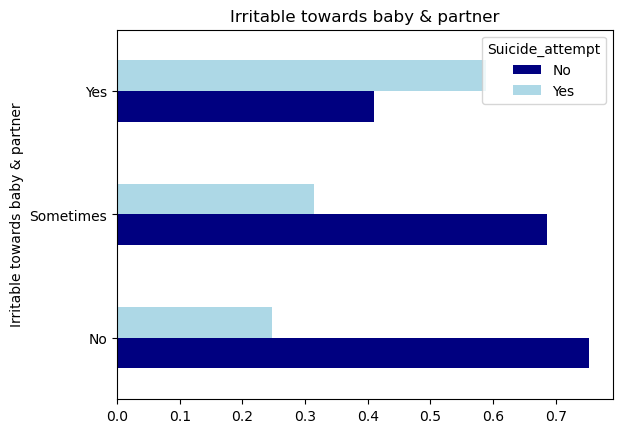

<Figure size 300x400 with 0 Axes>

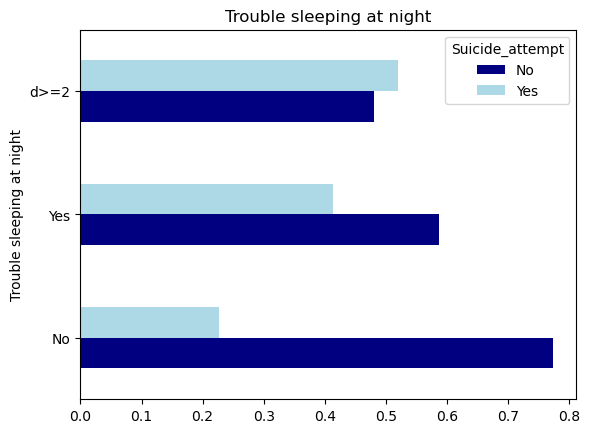

<Figure size 300x400 with 0 Axes>

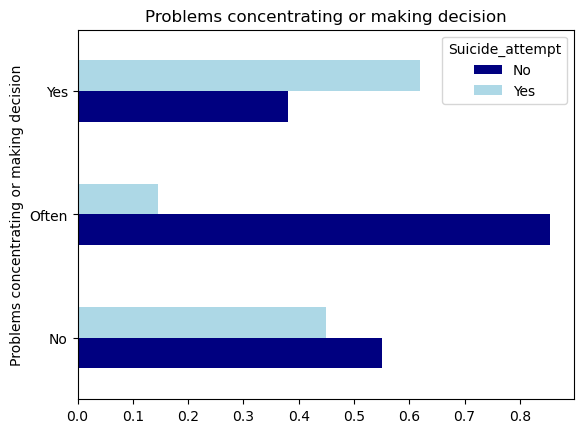

<Figure size 300x400 with 0 Axes>

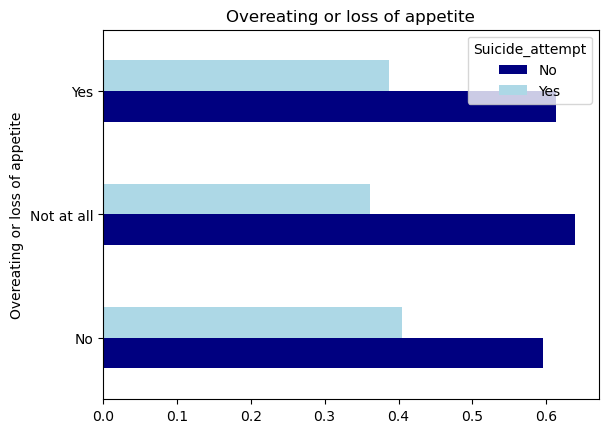

<Figure size 300x400 with 0 Axes>

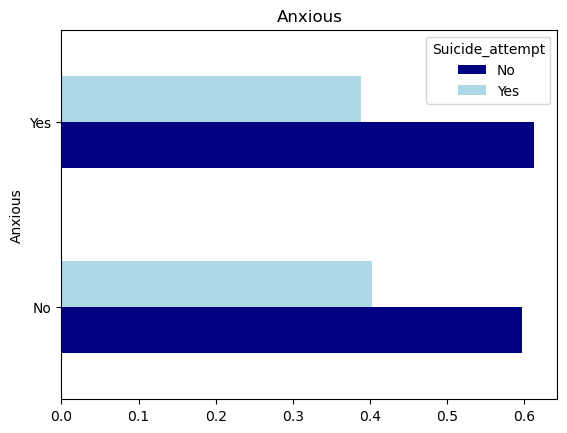

<Figure size 300x400 with 0 Axes>

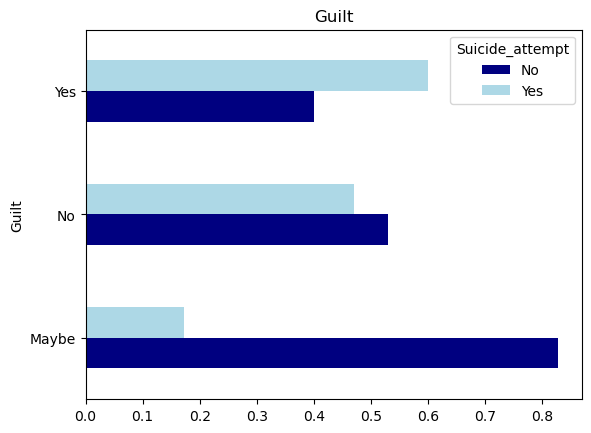

<Figure size 300x400 with 0 Axes>

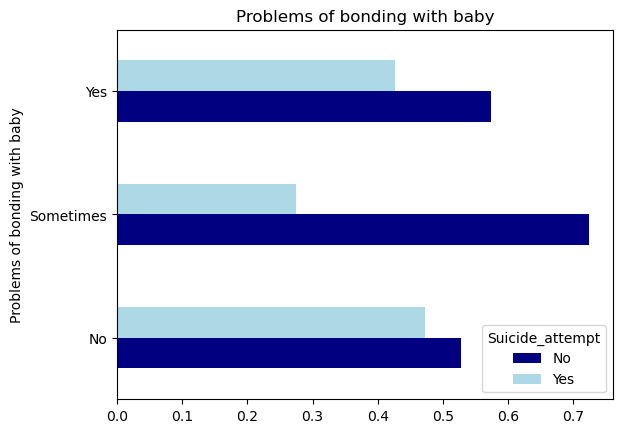

In [87]:
for i in Data.columns:#Feature Correlations
    if i != 'Suicide_attempt':
        plt.figure(figsize=(3,4))
        a = Data.groupby(i).Suicide_attempt.value_counts(normalize=True)
        a.unstack().plot(kind='barh',color=['navy', 'lightblue']) # 'lightblue' for 'Yes' and 'navy' for 'No'
        plt.title(i)
        plt.show()

### 4.Data transformation

In [88]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1156 non-null   object
 1   Feeling sad or Tearful                     1156 non-null   object
 2   Irritable towards baby & partner           1156 non-null   object
 3   Trouble sleeping at night                  1156 non-null   object
 4   Problems concentrating or making decision  1156 non-null   object
 5   Overeating or loss of appetite             1156 non-null   object
 6   Anxious                                    1156 non-null   object
 7   Guilt                                      1156 non-null   object
 8   Problems of bonding with baby              1156 non-null   object
 9   Suicide_attempt                            1156 non-null   object
dtypes: object(10)
memory usage: 99.3+ KB

In [89]:
Data['Suicide_attempt'] = Data['Suicide_attempt'].replace({'Yes': 1, 'No': 0})

In [90]:
#show first 5 rows
Data.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Anxious,Guilt,Problems of bonding with baby,Suicide_attempt
0,35-40,Yes,Yes,d>=2,Yes,Yes,Yes,No,Yes,1
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,0
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,0
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,0
4,40-45,Yes,No,d>=2,Yes,No,Yes,No,Yes,0


In [91]:
#Split data
X = Data.iloc[:, :-1]
y = Data.loc[:,'Suicide_attempt']

In [92]:
# Using make_column_transformer to One-Hot Encode
column_transformer = make_column_transformer((OneHotEncoder(), ['Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Anxious', 'Guilt',
       'Problems of bonding with baby']), remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)
X_transformed = pd.DataFrame(data=X_transformed)

## Model building and selection
#### 1. Splitting Data into training and testing data
#### 2. Train & Evaluate Random Forest model 
#### 3. Improve model performance

### 1.Splitting Data into training and testing data

In [93]:
# Splitting Data into training and testing data
X = Data.drop('Suicide_attempt', axis=1)
y = Data['Suicide_attempt'].values
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=.33, random_state=42,stratify=y)

In [94]:
# Print the shape
print("shape of training set :", X_train.shape, y_train.shape)
print("shape of testing set :", X_test.shape, y_test.shape)

shape of training set : (774, 28) (774,)
shape of testing set : (382, 28) (382,)


### 2. Train & Evaluate Decision Tree Model

In [95]:
DT_Classifier= DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=2, random_state=42)
DT_Classifier.fit(X_train, y_train)
y_pred = DT_Classifier.predict(X_test)

**Confusion Matrix**

Confusion Matrix for DecisionTreeClassifier
before hyperparameter tuning:


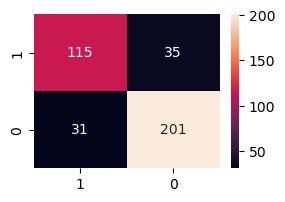

<Figure size 640x480 with 0 Axes>

In [96]:
cm = confusion_matrix(y_test, y_pred,labels=[1,0]) 
print("Confusion Matrix for DecisionTreeClassifier\nbefore hyperparameter tuning:")
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt="d",xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.show()
plt.savefig("DecisionTreeClassifier.jpg")

#### Model Evaluation

In [97]:
folds=4
cv_DT=cross_val_score(DT_Classifier, X_transformed, y, cv=folds,scoring='f1')
print("Average F1 accuracy across all 4 folds for DT - data - : {:.2f}".format(cv_DT.mean()))

precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred)
print(f"F-score for testing data: {f1_score[1]:.2f}")
print(f"Recall: {recall[1]:.2f}")
print(f"Precision: {precision[1]:.2f}\n")

Average F1 accuracy across all 4 folds for DT - data - : 0.81
F-score for testing data: 0.78
Recall: 0.77
Precision: 0.79



**check overfitting**

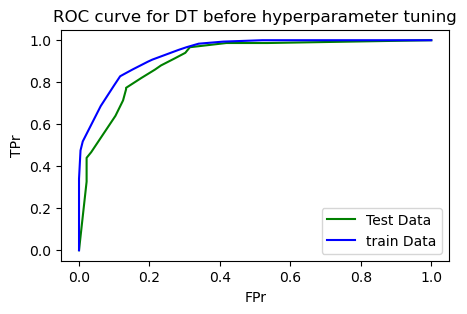

Area under the curve for testing data =0.904
Area under the curve for testing data =0.941


In [98]:
# ROC & AUC for test data
predictions = DT_Classifier.predict_proba(X_test)
AUC = roc_auc_score(y_test, predictions[:,1])
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
# ROC & AUC for train data
predictions_train = DT_Classifier.predict_proba(X_train)
AUC_train = roc_auc_score(y_train, predictions_train[:,1])
fprT, tprT, _ = roc_curve(y_train, predictions_train[:,1]) 

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color="green",label="Test Data")
plt.plot(fprT, tprT,color="blue",label="train Data")
plt.xlabel('FPr', size=10)
plt.ylabel('TPr', size=10)
plt.legend()
plt.title('ROC curve for DT before hyperparameter tuning')
plt.show()
print(f"Area under the curve for testing data ={AUC:.3f}")
print(f"Area under the curve for testing data ={AUC_train:.3f}")

Since there is a slight difference in AUC values between the train and test data, we can conclude that the model is not overfitting.

In [99]:
# caluclate F1 score for training data to check overfitting
y_pred_TrainDT= DT_Classifier.predict(X_train)
_, _, f1_scoreTrainDT,_= precision_recall_fscore_support(y_train, y_pred_TrainDT)
print(f"F-score for testing data: {f1_score[1]:.3f}")
print(f"F-score for training data: {f1_scoreTrainDT[1]:.3f}")

F-score for testing data: 0.777
F-score for training data: 0.824


we also test F1 score to check overfitting , and we can infer that the model is not overfitting because there is no diffrence between train and test score

### 3. Improve model performance

**hyperparameter tuning**

In [100]:
# define dictionary of parameters
parameters = {'max_depth' : randint(1, 18)
              ,'criterion' : ['gini', 'entropy']
              ,'min_samples_split' : randint(2, 18)
              ,"min_samples_leaf":randint(1,10)
             }

In [101]:
# use RandomizedSearchCV to find best parameters for DT model
random_search= RandomizedSearchCV(DecisionTreeClassifier(),param_distributions = parameters,n_iter=50,
                                         cv = 5,random_state=42,verbose = True)

In [102]:
random_search.fit(X_train,y_train) #biuld models to figur out best parameters
random_search.best_estimator_.get_params() #print best parameters values

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**Train & Evaluate model with best hyperparameters**

In [103]:
#build new model with best parameters
DT_Classifier_2= DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=1,
                       min_samples_split=5,random_state=42)
DT_Classifier_2.fit(X_train,y_train)
y_pred_2 = DT_Classifier_2.predict(X_test)

**Confusion Matrix**

Confusion Matrix for DecisionTreeClassifier
after hyperparameter tuning:


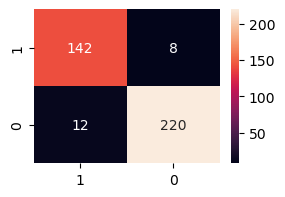

In [104]:
cm = confusion_matrix( y_test, y_pred_2,labels=[1,0]) 
print("Confusion Matrix for DecisionTreeClassifier\nafter hyperparameter tuning:")
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt="d",xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.show()

**Model Evaluation**

In [105]:
cv_DT_2=cross_val_score(DT_Classifier_2, X_transformed, y, cv=folds,scoring='f1')
print("Average F1 accuracy across all 4 folds for DT - data - : {:.3f}".format(cv_DT_2.mean()))
precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred_2)
print(f"F-score for testing data: {f1_score[1]:.3f}")
print(f"Recall: {recall[1]:.3f}")
print(f"Precision: {precision[1]:.3f}\n")

Average F1 accuracy across all 4 folds for DT - data - : 0.967
F-score for testing data: 0.934
Recall: 0.947
Precision: 0.922



**check overfitting**

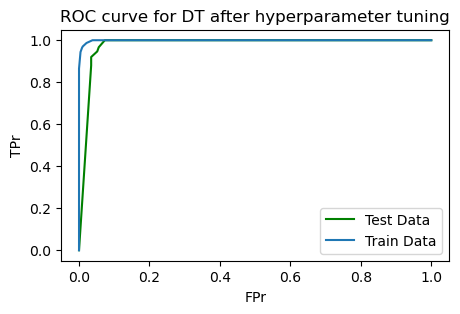

Area under the curve =0.979
Area under the curve (training) =0.999


In [106]:
# ROC & AUC for test data
predictions_2= DT_Classifier_2.predict_proba(X_test)
AUC2= roc_auc_score(y_test, predictions_2[:,1])
fpr2, tpr2, _ = roc_curve(y_test, predictions_2[:,1])
# ROC & AUC for train data
predictions_train_2= DT_Classifier_2.predict_proba(X_train)
AUC_train2= roc_auc_score(y_train, predictions_train_2[:,1])
fprTrain, tprTrain, _ = roc_curve(y_train, predictions_train_2[:,1]) 

plt.figure(figsize=(5,3))
plt.plot(fpr2, tpr2, color="green",label="Test Data")
plt.plot(fprTrain, tprTrain,label="Train Data")
plt.xlabel('FPr', size=10)
plt.ylabel('TPr', size=10)
plt.legend()
plt.title('ROC curve for DT after hyperparameter tuning')
plt.show()
print(f"Area under the curve ={AUC2:.3f}")
print(f"Area under the curve (training) ={AUC_train2:.3f}")

Since there is a slight difference in AUC values between the train and test data, we can conclude that the model is not overfitting.

In [107]:
y_pred_t2= DT_Classifier_2.predict(X_train)
_, _, f1_scoreT2,_= precision_recall_fscore_support(y_train, y_pred_t2)
print(f"F-score for testing data: {f1_score[1]:.3f}")
print(f"F-score for training data: {f1_scoreT2[1]:.3f}")

F-score for testing data: 0.934
F-score for training data: 0.977


we also test F1 score to check overfitting , and we can infer that the model is not overfitting because there is no diffrence between train and test score

**Tree Graph**

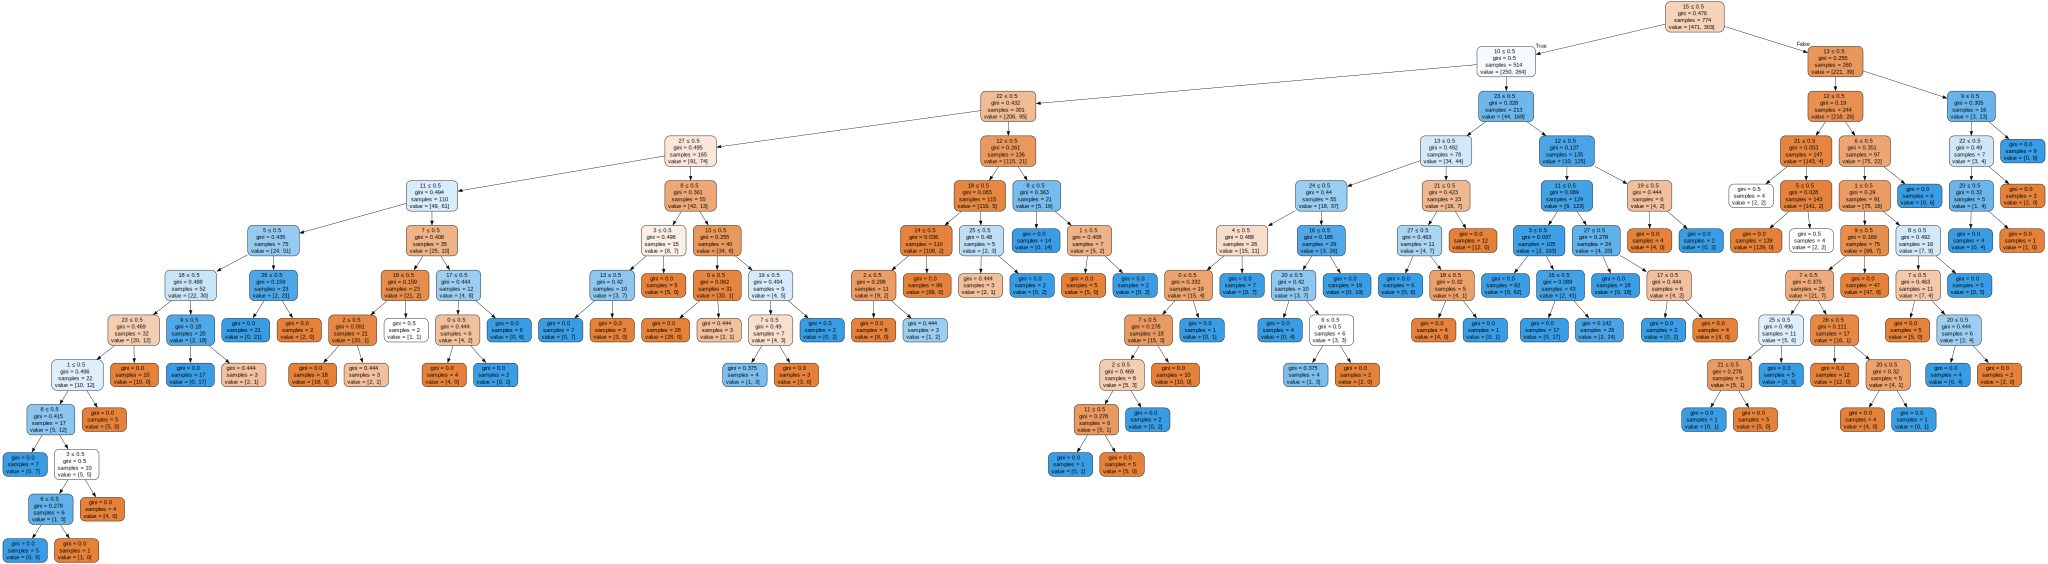

In [108]:
DT_graph = export_graphviz(DT_Classifier_2,filled=True,
                           rounded=True,  
                           feature_names=X_transformed.columns,
                           special_characters=True)  
graph = graphviz.Source(DT_graph)  
graph

## Support vector machine (SVM)
#### 1. Splitting Data into training and testing data 
###### ***NOTE : step 1 applied previously**
#### 2. Train & Test SVM classification model 
#### 3. Evaluate SVM classification model performance

#### 2. Train & Test SVM classification model 

In [109]:
SVC_model= SVC(C=3.70 ,kernel='rbf', gamma='scale',probability=True)
SVC_model.fit(X_train, y_train)
y_pred_SVM= SVC_model.predict(X_test)

#### 3. Evaluate SVM classification model performance

**Confusion Matrix**

Confusion Matrix for support vector machine(SVM) :


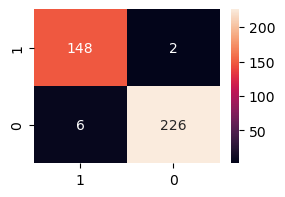

In [110]:
cm = confusion_matrix( y_test, y_pred_SVM,labels=[1,0]) 
print("Confusion Matrix for support vector machine(SVM) :")
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt="d",xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.show()

**Model Evaluation**

In [111]:
#cross validation 
cv_SVC=cross_val_score(SVC_model, X_transformed, y, cv=folds,scoring='f1')
print("Average F1 accuracy across all 4 folds for SVC model - data - : {:.2f}".format(cv_SVC.mean()))
# evaluate perfomance for testing set 
prf_SVM_test = precision_recall_fscore_support(y_test, y_pred_SVM,average='binary')
print("Testing data : ")
print(f"F-score: {prf_SVM_test[2]:.3f}")
print(f"Recall: {prf_SVM_test[1]:.3f}")
print(f"Precision: {prf_SVM_test[0]:.3f}\n")

Average F1 accuracy across all 4 folds for SVC model - data - : 0.99
Testing data : 
F-score: 0.974
Recall: 0.987
Precision: 0.961



**check overfitting**

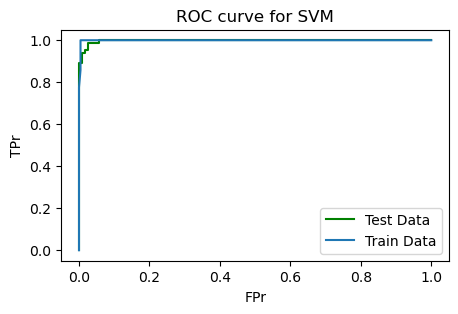

Area under the curve =0.998
Area under the curve (training) =0.999


In [112]:
# ROC & AUC for test data
predictions_SVM= SVC_model.predict_proba(X_test)
AUC_SVM= roc_auc_score(y_test, predictions_SVM[:,1])
fprS, tprS, _ = roc_curve(y_test, predictions_SVM[:,1])
# ROC & AUC for train data
predictions_train_2S= SVC_model.predict_proba(X_train)
AUC_train2S= roc_auc_score(y_train, predictions_train_2S[:,1])
fprTrainS, tprTrainS, _ = roc_curve(y_train, predictions_train_2S[:,1]) 

plt.figure(figsize=(5,3))
plt.plot(fprS, tprS, color="green",label="Test Data")
plt.plot(fprTrainS, tprTrainS,label="Train Data")
plt.xlabel('FPr', size=10)
plt.ylabel('TPr', size=10)
plt.legend()
plt.title('ROC curve for SVM')
plt.show()
print(f"Area under the curve ={AUC_SVM:.3f}")
print(f"Area under the curve (training) ={AUC_train2S:.3f}")

Since there is a slight difference in AUC values between the train and test data, we can conclude that the model is not overfitting.

In [113]:
y_pred_2svm= SVC_model.predict(X_train)
_, _, f1_scoreTS,_= precision_recall_fscore_support(y_train, y_pred_2svm)
print(f"F-score: {prf_SVM_test[2]:.3f}")
print(f"F-score for training data: {f1_scoreTS[1]:.3f}")

F-score: 0.974
F-score for training data: 0.997


we also test F1 score to check overfitting , and we can infer that the model is not overfitting because there is no diffrence between train and test score

## Compare the performance between Support Vector Machine (SVM) and Decision Tree (DT) classifiers

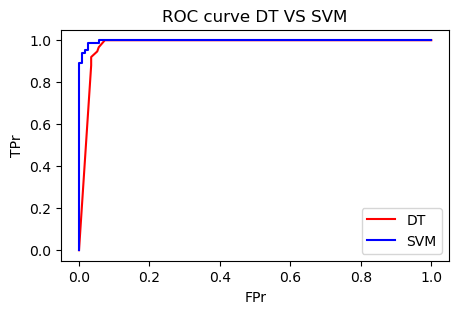

Area under the curve for SVM =0.998
Area under the curve for DT=0.979


In [114]:
plt.figure(figsize=(5,3))
plt.plot(fpr2, tpr2, color="red",label='DT')
plt.plot(fprS, tprS, color="blue",label='SVM')
plt.xlabel('FPr', size=10)
plt.ylabel('TPr', size=10)
plt.title('ROC curve DT VS SVM')
plt.legend()
plt.show()
print(f"Area under the curve for SVM ={AUC_SVM:.3f}")
print(f"Area under the curve for DT={AUC2:.3f}")